## Introducción a la Generalización en modelos

En este notebook encontrarás material introductorio para entender el concepto de generalización en modelos de IA y cómo este, bien empleado puede aumentar el rendimiento de los modelos.

**Entendamos el sobreajuste y el subajuste**

Para esto, tal como vimos en la lectura de la semana, vamos a entrenar en base a un conjunto de datos generados a partir de una distribución sinusoidal un modelo polinomial de grado 1, 3 y 21 (Estos valores los puedes cambiar para ver como se ajustan al conjunto de datos). Así podremos comparar mediante la métrica MSE, que modelo generalizaría mejor el conjunto de datos.

-------- Polinomio grado 1 - lineal --------
MSE en el conjunto de entrenamiento: 0.16
MSE en el conjunto de prueba: 0.18
-------- Polinomio grado 3 - lineal --------
MSE en el conjunto de entrenamiento: 0.02
MSE en el conjunto de prueba: 0.02
-------- Polinomio grado 21 - lineal --------
MSE en el conjunto de entrenamiento: 0.01
MSE en el conjunto de prueba: 0.02


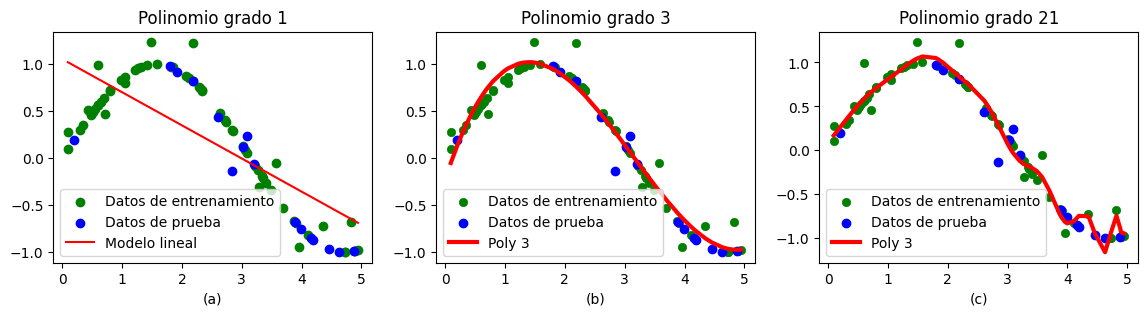

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

grado_polinomios = [3,21] #puedes cambiar estos valores para probar con diferentes grados de polinomios

# Generar datos de ejemplo sinusoidales
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(16))

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear y entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Crear y entrenar el modelo de regresión polinómica
polynomial_model_1 = make_pipeline(PolynomialFeatures(degree=grado_polinomios[0]), LinearRegression())
polynomial_model_1.fit(X_train, y_train)

polynomial_model_2 = make_pipeline(PolynomialFeatures(degree=grado_polinomios[1]), LinearRegression())
polynomial_model_2.fit(X_train, y_train)

# Predicciones
y_pred_train_linear = linear_model.predict(X_train)
y_pred_test_linear = linear_model.predict(X_test)

y_pred_train_poly_1 = polynomial_model_1.predict(X_train)
y_pred_test_poly_1 = polynomial_model_1.predict(X_test)

y_pred_train_poly_2 = polynomial_model_2.predict(X_train)
y_pred_test_poly_2 = polynomial_model_2.predict(X_test)

# Calcular el error cuadrático medio para cada modelo
mse_train_linear = mean_squared_error(y_train, y_pred_train_linear)
mse_test_linear = mean_squared_error(y_test, y_pred_test_linear)

mse_train_poly_1 = mean_squared_error(y_train, y_pred_train_poly_1)
mse_test_poly_1 = mean_squared_error(y_test, y_pred_test_poly_1)

mse_train_poly_2 = mean_squared_error(y_train, y_pred_train_poly_2)
mse_test_poly_2 = mean_squared_error(y_test, y_pred_test_poly_2)

# Imprimir los errores
print(f'-------- Polinomio grado 1 - lineal --------')
print(f'MSE en el conjunto de entrenamiento: {mse_train_linear:.2f}')
print(f'MSE en el conjunto de prueba: {mse_test_linear:.2f}')

print(f'-------- Polinomio grado {grado_polinomios[0]} - lineal --------')
print(f'MSE en el conjunto de entrenamiento: {mse_train_poly_1:.2f}')
print(f'MSE en el conjunto de prueba: {mse_test_poly_1:.2f}')

print(f'-------- Polinomio grado {grado_polinomios[1]} - lineal --------')
print(f'MSE en el conjunto de entrenamiento: {mse_train_poly_2:.2f}')
print(f'MSE en el conjunto de prueba: {mse_test_poly_2:.2f}')

# Graficar los resultados
plt.figure(figsize=(14, 3))

plt.subplot(1, 3, 1)
plt.scatter(X_train, y_train, color='green', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(X, linear_model.predict(X), color='red', label='Modelo lineal')
plt.title('Polinomio grado 1')
plt.xlabel("(a)")
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X_train, y_train, color='green', label='Datos de entrenamiento', lw=.5)
plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(X, polynomial_model_1.predict(X), color='red', label=f'Poly {grado_polinomios[0]}', lw=3)
plt.title(f'Polinomio grado {grado_polinomios[0]}')
plt.xlabel("(b)")
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X_train, y_train, color='green', label='Datos de entrenamiento', lw=.5)
plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(X, polynomial_model_2.predict(X), color='red', label=f'Poly {grado_polinomios[0]}', lw=3)
plt.title(f'Polinomio grado {grado_polinomios[1]}')
plt.xlabel("(c)")
plt.legend()

plt.show()

### Observaciones:

*   Note que si el polinomio tiene un grado grande, este tiende a sobreajustarse a los datos de entrenamiento. Haciendo que el error *MSE* sea inferior que el polinomio de grado 3. Esto podría crear una falsa sensación de un buen modelo. Sin embargo, el modelo que se genera no generaliza bien los datos de test.
*   Como lo mencionamos en la lectura de la semana. El tener un modelo muy simple puede llevar a un subajuste (modelo lineal). Este no es capaz ni de ajustarse a los datos de entrenamiento. Por lo cual su única finalidad sería de tomarlo de punto de partida para medir nuestro progreso.


**Entendamos la diversidad y la cantidad de datos**
Para ver como mejora nuestro modelo si tenemos una diversidad y cantidad de datos suficiente, haremos lo siguiente:

1.   Definimos unos datos sintéticos de entrenamiento. En este caso en base a una función sinusoidal.
2.   Definimos diferentes tamaños de conjuntos de entrenamiento. desde 1 hasta 60 registros, aumentando de a 10 cada conjunto de datos.
3. Entrenamos cada modelo con cada conjunto de datos y calculamos el error *MSE* para ver como se comporta al ir aumentando el conjunto de datos.




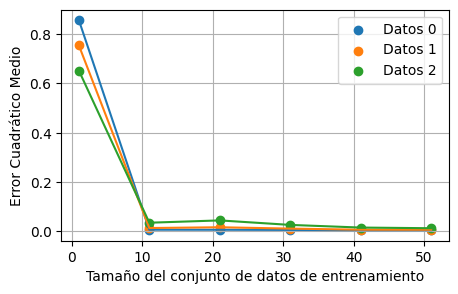

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Función para generar datos sintéticos
def generate_data(n_samples, noise_level):
    np.random.seed(12)
    X = np.sort(5 * np.random.rand(n_samples, 1), axis=0)
    y = np.sin(X).ravel()
    y += noise_level * (0.5 - np.random.rand(n_samples))
    return X, y

# Generar un conjunto de prueba fijo
X_test, y_test = generate_data(100, 0.1)

# Tamaños de conjunto de datos y niveles de diversidad
sizes = range(1,60,10)
noise_levels = [0.1, 0.5, 1.0]

# Definimos una matriz para almacenar los errores
errors = np.zeros((len(sizes), len(noise_levels)))

models = list()
data = dict()

# Entrenar modelos y calcular errores
for i, size in enumerate(sizes):
    for j, noise in enumerate(noise_levels):
        X_train, y_train = generate_data(size, noise)
        model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        errors[i, j] = mean_squared_error(y_test, y_pred)
    data[size] = (X_train, y_train)
    models.append(model)

# Graficar los resultados
plt.figure(figsize=(5, 3))

for j, noise in enumerate(noise_levels):
    plt.scatter(sizes, errors[:, j], label=f'Datos {j}')
    plt.plot(sizes, errors[:, j])

plt.xlabel('Tamaño del conjunto de datos de entrenamiento')
plt.ylabel('Error Cuadrático Medio')
plt.legend()
plt.grid(True)
plt.show()

Si entramos a revisar los modelos, nos daremos cuenta que aún si el modelo empleado no es robusto, aún así puede que se disminuya el error *MSE* si contamos con mas datos relevantes.

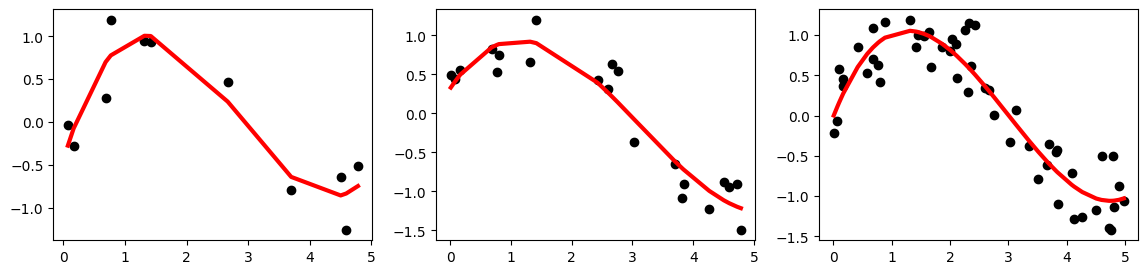

In [18]:
plt.figure(figsize=(14, 3))
plt.subplot(1, 3, 1)
plt.scatter(data[11][0], data[11][1], color="black");
plt.plot(data[11][0], models[1].predict(data[11][0]), color="red", lw=3);

plt.subplot(1, 3, 2)
plt.scatter(data[21][0], data[21][1], color="black");
plt.plot(data[21][0], models[2].predict(data[21][0]), color="red", lw=3);

plt.subplot(1, 3, 3)
plt.scatter(data[51][0], data[51][1], color="black");
plt.plot(data[51][0], models[-1].predict(data[51][0]), color="red", lw=3);

### Observaciones:

*  En el primer modelo, vemos que al tener poca cantidad de datos de entrenamiento, el polinomio que se genera no genera una curva suave. Lo cual nos da a entender que no logrará generalizar a nuevos datos. Pues intentó sobre ajustarse a los pocos datos de entrenamiento

* En el segundo modelo, vemos que la curva ya es más suave, pero aún así presenta una concavidad bastante leve. Que en realidad no generaliza bien la distribuición sinusoidal de donde vienen los datos de entrenamiento.

* El tercer modelo, al tener una mayor cantidad y diversidad de datos, ya logra generar una curva muchos mas suave y con unas concavidades mas acordes a la distribución de los datos de entrenamiento.


**Entendamos la importancia de la validación cruzada**
Para ver realmente si nuestro modelo está generalizando de forma correcta, podemos utilizar validación cruzada y así obtener un promedio de la métrica que queremos medir, la cual se volvería independiente de los datos de entrenamiento.

Para este ejemplo haremos lo siguiente:

1. Cargamos el conjunto de datos *[iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)*
2. Dividimos el conjunto en el 70% para entrenamiento y el 30% restante para pruebas.
3. Entrenamos un modelo de *k* vecinos cercanos y calculamos su *accuracy* en el conjunto de prueba sin validación cruzada y empleando la validación cruzada.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predecir y evaluar el modelo
y_pred = knn.predict(X_test)
accuracy_no_cv = accuracy_score(y_test, y_pred)
print(f"Exactitud sin validación cruzada: {accuracy_no_cv:.2f}")

# Evaluar el modelo usando validación cruzada
cv_scores = cross_val_score(knn, X, y, cv=10)
accuracy_cv = np.mean(cv_scores)
print(f"Exactitud con validación cruzada: {accuracy_cv:.2f}")

Exactitud sin validación cruzada: 1.00
Exactitud con validación cruzada: 0.97


### Observaciones:

*  Note que al ser un conjunto de datos muy ideal, se tiene, sin validacion cruzada un *accuracy* de 100%, lo cual nunca se dará en un entorno real.
*  Cabe destacar que aplicando validación cruzada, logramos evidenciar, que generalizando el modelo, ese en realidad no tendría un *accuracy* del 100%, si no, en promedio, sin depender del conjunto de entrenamiento, este tendrá un *accuracy* del 97%.